In [1]:
import cv2
import numpy as np
import os

%matplotlib notebook
import matplotlib.pyplot as plt

In [10]:
paths = ["data/"+el for el in os.listdir("data") if el[-4:]==".mp4"]
path = paths[0]
video = cv2.VideoCapture(path)

<IPython.core.display.Javascript object>


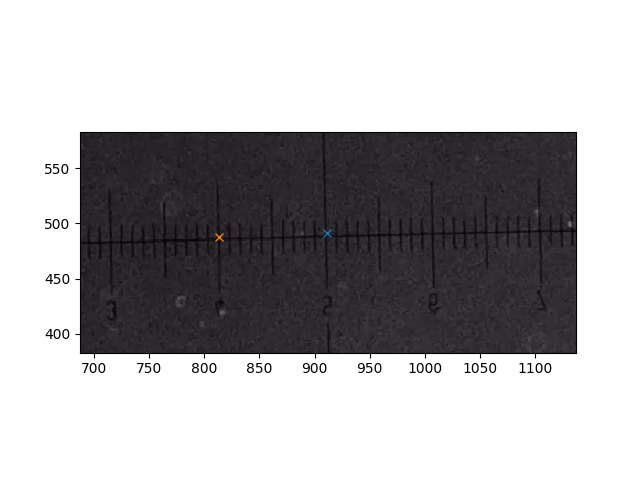

In [14]:
fig, ax = plt.subplots()
ax.imshow(video.read()[1])
ax.set_xlim((650,1100))
ax.set_ylim((400,600))

ctrl = False
pos_centre = []
pos_lower = []
def onpress(event):
    global ctrl
    if event.key == 'control':
        ctrl = True
def onrelease(event):
    global ctrl
    if event.key == 'control':
        ctrl = False
def onbutton(event):
    global pos_lower, pos_centre
    if ctrl:
        ax.plot([event.xdata], [event.ydata], "x")
        fig.canvas.draw()
        if not len(pos_centre):
            pos_centre = [event.xdata, event.ydata]
        elif not len(pos_lower):
            pos_lower = [event.xdata, event.ydata]
fig.canvas.mpl_connect('key_press_event', onpress)
fig.canvas.mpl_connect('key_release_event', onrelease)
fig.canvas.mpl_connect('button_press_event', onbutton)

plt.show()

In [18]:
text = "{:.1f},{:.1f}".format(*pos_centre)
text += "\n"
text += "{:.1f},{:.1f}".format(*pos_lower)
with open(path[:-4]+".txt", 'w') as f:
    f.write(text)